In [16]:
import numpy as np

# parameters
dt = 0.1 #[h]
N = 300; #number of samples
T = N * dt #whole time of simulation [h]
G = 6.67430 * (10**(-11-3-3-3)) * 3600 #[km^3 / kg*h^2]
M = 1.89819 * 10**27 # Mass of the planet (Jupiter) [kg]
x0p = 0 #start location of the planet
y0p = 0
x0s = 10000 #start location of the spacecraft [km]
y0s = -20000
Vxp = 1000 #velocity of the planet [km/h]
Vyp = 0
vx0s = -2000 #initial velocity of the spacecraft [km/h]
vy0s = 200
m = 1136 # Mass of the spacecraft [kg] 

#calculation variables
Xs = np.zeros(N) #x axis location of a spacecraft
Ys = np.zeros(N) #y axis location of a spacecraft

Xp = np.zeros(N) #x axis location of a planet
Yp = np.zeros(N) #y axis location of a planet

Vxs = np.zeros(N) #x axis velocity of a spacecraft
Vys = np.zeros(N) #y axis vleocity of a spacecraft


#intial state
Xs[0] = x0s
Ys[0] = y0s

Xp[0] = x0p
Yp[0] = y0p

Vxs[0] = vx0s
Vys[0] = vy0s

In [17]:
def calculateRange(xp,yp,xs,ys):
    return np.sqrt((xp-xs)**2+(yp-ys)**2)

def calculateVelocity(Vi,loci,r):
    return Vi - (G*M*loci)/(r**3) * dt

def calculatePosition(loci, Vi_):
    return loci + Vi_*dt

In [18]:
#Simple iterative approach

for i in range(1,N):
    # range between planet and spacecraft
    r = calculateRange(Xp[i-1],Yp[i-1],Xs[i-1],Ys[i-1])
    
    # velocity of the spacecraft
    Vxs[i] = calculateVelocity(Vxs[i-1],Xs[i-1],r)
    print(Vxs[i])
    Vys[i] = calculateVelocity(Vys[i-1],Ys[i-1],r)
    
    # location of a spacecraft
    Xs[i] = calculatePosition(Xs[i-1],Vxs[i])
    Ys[i] = calculatePosition(Ys[i-1],Vys[i])
    
    # location of a planet
    Xp[i] = calculatePosition(Xp[i-1],Vxp)
    Yp[i] = calculatePosition(Yp[i-1],Vyp)

-2040.7936813371805
-2081.6232072982334
-2122.4942802595883
-2163.4120415730026
-2204.380973750101
-2245.4047847932866
-2286.486271337161
-2327.62715658459
-2368.8278981896847
-2410.0874602192725
-2451.4030420682357
-2492.7697556532066
-2534.1802402884
-2575.6242022610086
-2617.087863149272
-2658.5532972073233
-2699.997633476182
-2741.392092411379
-2782.70081941228
-2823.8794682685034
-2864.8734756553245
-2905.6159527080777
-2946.0251004869147
-2986.001031671622
-3025.4218496840326
-3064.138796892475
-3101.970233570978
-3138.694146613908
-3174.0388094570785
-3207.6711207542785
-3239.182039697722
-3268.0684157955307
-3293.7103956106084
-3315.343512801351
-3332.0246010260967
-3342.5909465319546
-3345.6128638625796
-3339.3415583523506
-3321.6574193802535
-3290.029769939592
-3241.5087726609145
-3172.7843854296225
-3080.3643760193713
-2960.935738352225
-2811.962519975479
-2632.507555484022
-2424.122684827768
-2191.4667351433536
-1942.22483720138
-1686.0996955756657
-1433.1183378091423
-1191

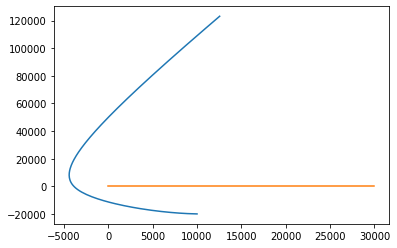

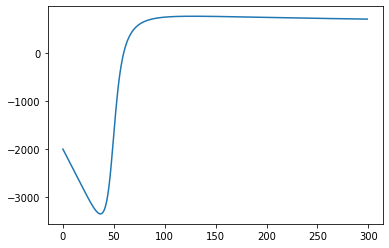

In [19]:
import matplotlib.pyplot as plt

plt.plot(Xs,Ys,Xp,Yp)
plt.show()

plt.plot(Vxs)
plt.show()



In [20]:
import math

class State:
    def __init__(self, x, y, vx, vy, m):
        self._x, self._y, self._vx, self._vy, self._m = x, y, vx, vy, m

    def __repr__(self):
        return 'x:{x} y:{y} vx:{vx} vy:{vy} m:{m}'.format(
            x=self._x, y=self._y, vx=self._vx, vy=self._vy, m=self._m)


class Derivative:
    def __init__(self, dx, dy, dvx, dvy):
        self._dx, self._dy, self._dvx, self._dvy = dx, dy, dvx, dvy

    def __repr__(self):
        return 'dx:{dx} dy:{dy} dvx:{dvx} dvy:{dvy}'.format(
            dx=self._dx, dy=self._dy, dvx=self._dvx, dvy=self._dvy)



def acceleration(obj_a, obj_b, unused_t):
        dx = obj_b._x - obj_a._x
        dy = obj_b._y - obj_a._y
        print("wsp x", obj_b._x, obj_a._x)
        print("wsp y",obj_b._y, obj_a._y)
        dr = math.sqrt(dx*dx + dy*dy)  # distance
        force = G*obj_b._m/(dr**3) if dr>1e-10 else 0.
        print("force", force)
        ax = force*dx
        ay = force*dy
        print("acc", ax,ay)
        return (ax, ay)

#calculate obj_a according to obj_b
def initialDerivative(obj_a,obj_b, t):
        ax, ay = acceleration(obj_a, obj_b, t)
        return Derivative(obj_a._vx, obj_a._vy, ax, ay)

    #calculate obj_a according to obj_b
def nextDerivative(initialState, obj_b, derivative, t, dt):
        state = State(0., 0., 0., 0., 0.)
        state._x = initialState._x + derivative._dx*dt
        state._y = initialState._y + derivative._dy*dt
        state._vx = initialState._vx + derivative._dvx*dt
        state._vy = initialState._vy + derivative._dvy*dt
        ax, ay = acceleration(state, obj_b, t+dt)
        return Derivative(state._vx, state._vy, ax, ay)

    #calculate obj_a according to obj_b
def update(obj_a, obj_b, t, dt):
        a = initialDerivative(obj_a,obj_b, t)
        b = nextDerivative(obj_a,obj_b, a, t, dt*0.5)
        c = nextDerivative(obj_a,obj_b, b, t, dt*0.5)
        d = nextDerivative(obj_a,obj_b, c, t, dt)
        dxdt = 1.0/6.0 * (a._dx + 2.0*(b._dx + c._dx) + d._dx)
        dydt = 1.0/6.0 * (a._dy + 2.0*(b._dy + c._dy) + d._dy)
        dvxdt = 1.0/6.0 * (a._dvx + 2.0*(b._dvx + c._dvx) + d._dvx)
        dvydt = 1.0/6.0 * (a._dvy + 2.0*(b._dvy + c._dvy) + d._dvy)
        
        return State(obj_a._x + dxdt*dt,obj_a._y + dydt*dt,obj_a._vx + dvxdt*dt, obj_a._vy + dvydt*dt, obj_a._m)

In [21]:
planet = State(x0p, y0p, Vxp, Vyp,M)
starcraft = State(x0s, y0s, vx0s, vy0s,m)
starcraft_states=[starcraft]
planet_states=[planet]
t=0.
for i in range(1,N):
        t += dt
        starcraft_states.append(update(starcraft_states[i-1],planet_states[i-1],t,dt))
        planet_states.append(update(planet_states[i-1],starcraft_states[i-1],t,dt))


wsp x 0 10000
wsp y 0 -20000
force 0.040793681337180435
acc -407.93681337180436 815.8736267436087
wsp x 0 9900.0
wsp y 0 -19990.0
force 0.04108791707733944
acc -406.77037906566045 821.3474623760154
wsp x 0 9898.980157966571
wsp y 0 -19987.960315933142
force 0.041100520669635404
acc -406.8532385908158 821.5155761088623
wsp x 0 9797.966148104671
wsp y 0 -19975.89326268812
force 0.041408751468395816
acc -405.7215451226218 827.1767994738549
wsp x 10000 0
wsp y -20000 0
force 2.4413584519482757e-26
acc 2.4413584519482756e-22 -4.882716903896551e-22
wsp x 10000 50.0
wsp y -20000 0.0
force 2.448682478367143e-26
acc 2.436439065975307e-22 -4.897364956734286e-22
wsp x 10000 50.0
wsp y -20000 -1.2206792259741379e-24
force 2.448682478367143e-26
acc 2.436439065975307e-22 -4.897364956734286e-22
wsp x 10000 100.0
wsp y -20000 -2.4486824783671434e-24
force 2.4560062102865233e-26
acc 2.431446148183658e-22 -4.912012420573046e-22
wsp x 100.0 9797.964065948287
wsp y -2.4462411362275207e-24 -19975.902105557

wsp y -2.2190998347126633e-21 -15550.023327818202
force 0.12113725474722419
acc -56.07528362774363 1883.6871371871923
wsp x 2700.0 3162.729992394704
wsp y -2.2190998347126633e-21 -15545.419624180888
force 0.12124493713484284
acc -56.103668838302184 1884.803425068564
wsp x 2700.0 3021.094372723624
wsp y -2.2190998347126633e-21 -15370.391075399413
force 0.12551884045687775
acc -40.3033933414978 1929.2736651528767
wsp x 3304.4392581965303 2700.0
wsp y -15720.237144551054 -2.2190998347126633e-21
force 7.010466310107456e-26
acc 4.2374010560931176e-23 -1.10206192888775e-21
wsp x 3304.4392581965303 2750.0
wsp y -15720.237144551054 -2.313819558613136e-21
force 7.012929020997977e-26
acc 3.888243164187038e-23 -1.1024490728799245e-21
wsp x 3304.4392581965303 2750.0
wsp y -15720.237144551054 -2.3165747134353556e-21
force 7.012929020997977e-26
acc 3.888243164187038e-23 -1.1024490728799245e-21
wsp x 3304.4392581965303 2800.0
wsp y -15720.237144551054 -2.4140515278780087e-21
force 7.015180484655542e-

wsp y 3275.1067340927743 -1.3110225560971646e-20
force 3.2580259177037453e-24
acc -9.453955310160676e-21 1.0670382622920327e-20
wsp x 2398.2565673314784 5350.0
wsp y 3275.1067340927743 -1.3396652744587103e-20
force 3.1847245482165888e-24
acc -9.40048977005654e-21 1.0430312814094718e-20
wsp x 2398.2565673314784 5350.0
wsp y 3275.1067340927743 -1.3369976788029803e-20
force 3.1847245482165888e-24
acc -9.40048977005654e-21 1.0430312814094718e-20
wsp x 2398.2565673314784 5400.0
wsp y 3275.1067340927743 -1.3630928364132087e-20
force 3.1129478812462785e-24
acc -9.344270858770405e-21 1.019523656874952e-20
wsp x 5400.0 3563.1959473415745
wsp y -1.3630528247784043e-20 4067.0076206519243
force 5.13212307358286
acc 9426.704460298812 -20872.38365038507
wsp x 5400.0 4174.551218283783
wsp y -1.3630528247784043e-20 4411.467534620033
force 4.751983075286795
acc 5823.311870346285 -20963.219061691558
wsp x 5400.0 4198.117979434531
wsp y -1.3630528247784043e-20 4359.28657549407
force 4.932587997616942
acc

force 6.251518780994406e-26
acc 1.0072186993077407e-21 -1.7181830800010168e-22
wsp x 8200.0 24675.191232929254
wsp y -9.381922400422743e-21 -3149.518316692494
force 0.09664386805871054
acc -1592.2262077572395 304.3816326469215
wsp x 8200.0 24852.987218678147
wsp y -9.381922400422743e-21 -3349.3307453402062
force 0.09305481818981483
acc -1549.640697951405 311.6713635651899
wsp x 8200.0 24849.00665315875
wsp y -9.381922400422743e-21 -3348.5697912585892
force 0.09312145024899354
acc -1550.379644747285 311.82367522196944
wsp x 8200.0 25023.03500093728
wsp y -9.381922400422743e-21 -3547.5848171700927
force 0.08974113525290009
acc -1509.7182593833847 318.36428889879613
wsp x 24675.191232929254 8200.0
wsp y -3149.518316692494 -9.381922400422743e-21
force 5.783795832592901e-26
acc 9.52891423941873e-22 -1.8216170914761056e-22
wsp x 24675.191232929254 8250.0
wsp y -3149.518316692494 -9.255889441137998e-21
force 5.834894580351842e-26
acc 9.58392593062615e-22 -1.837710735678789e-22
wsp x 24675.191

acc -712.1358165045361 482.262856148181
wsp x 11000.0 30098.20491866646
wsp y -3.2641470331094916e-21 -13051.602603847427
force 0.03684790605627322
acc -703.7288606864769 480.92422663038093
wsp x 30036.37807255623 11000.0
wsp y -12773.35459387396 -3.2641470331094916e-21
force 2.265557386673964e-26
acc 4.312800695779804e-22 -2.8938767852756965e-22
wsp x 30036.37807255623 11050.0
wsp y -12773.35459387396 -3.1739208817767024e-21
force 2.2779066183246472e-26
acc 4.324919626948979e-22 -2.9096508967593033e-22
wsp x 30036.37807255623 11050.0
wsp y -12773.35459387396 -3.1746443509730212e-21
force 2.2779066183246472e-26
acc 4.324919626948979e-22 -2.9096508967593033e-22
wsp x 30036.37807255623 11100.0
wsp y -12773.35459387396 -3.085149555892293e-21
force 2.2903355253373638e-26
acc 4.3370659420795005e-22 -2.925526780408075e-22
wsp x 11100.0 30098.19029188024
wsp y -3.0851469268737123e-21 -13051.600154791442
force 0.03724502081529015
acc -707.5879928739229 486.1071194380514
wsp x 11100.0 30127.323

wsp x 29421.226383596757 13850.0
wsp y -18636.17824824459 6.313792471634889e-22
force 1.9057340111427663e-26
acc 2.967461571442392e-22 -3.551559872539873e-22
wsp x 29421.226383596757 13900.0
wsp y -18636.17824824459 6.763448134841897e-22
force 1.9132941316924182e-26
acc 2.9696671356405207e-22 -3.5656490479540263e-22
wsp x 13900.0 29319.615472238762
wsp y 6.763471537343999e-22 -18766.43435369059
force 0.031829672113241024
acc -490.80130459361794 597.3294522126338
wsp x 13900.0 29267.58031111231
wsp y 6.763471537343999e-22 -18830.08211312938
force 0.03176576977468082
acc -488.1630181567115 598.1520532440032
wsp x 13900.0 29266.353307850826
wsp y 6.763471537343999e-22 -18828.58878949885
force 0.031773349065488135
acc -488.24050751396254 598.2473240192836
wsp x 13900.0 29213.104334895073
wsp y 6.763471537343999e-22 -18890.73911230195
force 0.03171609386345803
acc -485.67185442645814 599.1404548358665
wsp x 29319.615472238762 13900.0
wsp y -18766.43435369059 6.763471537343999e-22
force 1.90

wsp y -19680.310381618525 1.558901019656905e-21
force 2.857668634436004e-26
acc 2.2657221663880967e-22 -5.623980569351653e-22
wsp x 24628.56855089941 16750.0
wsp y -19680.310381618525 1.5418112109090908e-21
force 2.8652108202023923e-26
acc 2.257375985974327e-22 -5.638823825035487e-22
wsp x 24628.56855089941 16750.0
wsp y -19680.310381618525 1.540405215766753e-21
force 2.8652108202023923e-26
acc 2.257375985974327e-22 -5.638823825035487e-22
wsp x 24628.56855089941 16800.0
wsp y -19680.310381618525 1.521901990248759e-21
force 2.8727382120575334e-26
acc 2.2489428021880605e-22 -5.653637965842811e-22
wsp x 16800.0 24400.611379574173
wsp y 1.5219044641247063e-21 -19598.09744266141
force 0.049105333227966314
acc -373.2305545302625 962.371105556043
wsp x 16800.0 24285.690335674233
wsp y 1.5219044641247063e-21 -19554.61245101853
force 0.04968378856285513
acc -371.91745588464664 971.5472304449789
wsp x 16800.0 24284.757259287908
wsp y 1.5219044641247063e-21 -19552.20652325464
force 0.049702162528

wsp y -12524.43098821852 -2.6391614241105867e-21
force 1.3166002400556447e-25
acc -3.150666359794752e-22 -1.6489668845648859e-21
wsp x 19600.0 16938.314937958832
wsp y -2.6391673334797133e-21 -11998.627746870641
force 0.24567431796922484
acc 653.9076622658379 2947.7546882790616
wsp x 19600.0 16805.45981492805
wsp y -2.6391673334797133e-21 -11728.486907417764
force 0.260225463827412
acc 727.21051584469 3052.050945476517
wsp x 19600.0 16807.094584083716
wsp y -2.6391673334797133e-21 -11721.117520697066
force 0.2607147825570479
acc 728.1517282130154 3055.8686057341397
wsp x 19600.0 16676.24074447649
wsp y -2.6391673334797133e-21 -11443.085813237503
force 0.27683515509134193
acc 809.3993469525972 3167.848435831139
wsp x 16938.314937958832 19600.0
wsp y -11998.627746870641 -2.6391673334797133e-21
force 1.4702744467784543e-25
acc -3.9134075320910536e-22 -1.7641275772630844e-21
wsp x 16938.314937958832 19650.0
wsp y -11998.627746870641 -2.7919215649592525e-21
force 1.4663604870487474e-25
acc 

force 3.1614871580603933e-25
acc 2.7563324137141096e-21 1.2104111059890973e-21
wsp x 31218.46784728093 22550.0
wsp y 3828.6130718674112 -1.1967757245665025e-20
force 3.2075069406557073e-25
acc 2.7804170785004415e-21 1.228030300109989e-21
wsp x 31218.46784728093 22550.0
wsp y 3828.6130718674112 -1.1964731217900052e-20
force 3.2075069406557073e-25
acc 2.7804170785004415e-21 1.228030300109989e-21
wsp x 31218.46784728093 22600.0
wsp y 3828.6130718674112 -1.185511872234888e-20
force 3.254379666546354e-25
acc 2.804776651897458e-21 1.2459760532158878e-21
wsp x 22600.0 32013.865090681313
wsp y -1.1855148087672415e-20 3471.4593162282135
force 0.45152894951209605
acc -4250.632615243926 -1567.4643783305046
wsp x 22600.0 32400.77322025795
wsp y -1.1855148087672415e-20 3288.6855560000313
force 0.4128197655649111
acc -4045.952903141746 -1357.6344002446424
wsp x 22600.0 32390.146638719838
wsp y -1.1855148087672415e-20 3284.766895054205
force 0.41417900031717464
acc -4054.87314778353 -1360.48146886850

wsp x 44305.04491502682 25650.0
wsp y -8254.339547848482 -4.365403339270731e-21
force 3.215287505057803e-26
acc 5.998133282157783e-22 -2.65400748107017e-22
wsp x 44305.04491502682 25650.0
wsp y -8254.339547848482 -4.366062398554485e-21
force 3.215287505057803e-26
acc 5.998133282157783e-22 -2.65400748107017e-22
wsp x 44305.04491502682 25700.0
wsp y -8254.339547848482 -4.2564329566679674e-21
force 3.23700034903735e-26
acc 6.022453688379738e-22 -2.6719299997458335e-22
wsp x 25700.0 44486.17444331274
wsp y -4.2564299949436256e-21 -8599.202211038857
force 0.05171417479999084
acc -971.5115089845956 444.7006462821312
wsp x 25700.0 44574.30137111007
wsp y -4.2564299949436256e-21 -8770.534963444705
force 0.050590978374346056
acc -954.8693724967197 443.709944667077
wsp x 25700.0 44571.87259233761
wsp y -4.2564299949436256e-21 -8769.423211828998
force 0.050610461986336445
acc -955.1141904454873 443.824560104368
wsp x 25700.0 44657.65395204493
wsp y -4.2564299949436256e-21 -8939.649166127216
force

force 0.03166738784963499
acc -558.6865047872775 530.563981300073
wsp x 46279.051563306006 28600.0
wsp y -16554.88549463023 8.680491882499839e-22
force 1.921139591822523e-26
acc 3.3963925904139037e-22 -3.180424596182253e-22
wsp x 46279.051563306006 28650.0
wsp y -16554.88549463023 9.346125186777723e-22
force 1.929844801581727e-26
acc 3.402133351626231e-22 -3.1948359712592887e-22
wsp x 46279.051563306006 28650.0
wsp y -16554.88549463023 9.338174125287268e-22
force 1.929844801581727e-26
acc 3.402133351626231e-22 -3.1948359712592887e-22
wsp x 46279.051563306006 28700.0
wsp y -16554.88549463023 9.995784311199312e-22
force 1.938591017806968e-26
acc 3.407859146219056e-22 -3.2093152320713033e-22
wsp x 28700.0 46242.322263188384
wsp y 9.995808330157774e-22 -16754.269495924764
force 0.031951860888909056
acc -560.5098406218075 535.3300882290805
wsp x 28700.0 46222.55363056123
wsp y 9.995808330157774e-22 -16852.63440954362
force 0.031740245459098614
acc -556.170153304233 534.906752791366
wsp x 28

In [22]:
for a, b in zip(starcraft_states, planet_states):
    print("starcraft:",a)
    print("planet: ",b)

starcraft: x:10000 y:-20000 vx:-2000 vy:200 m:1136
planet:  x:0 y:0 vx:1000 vy:0 m:1.89819e+27
starcraft: x:9797.964065948287 y:-19975.902105557954 vx:-2040.6817598967896 vy:282.1462750531203 m:1136
planet:  x:100.0 y:-2.4462411362275207e-24 vx:1000.0 vy:-4.897364858567791e-23 m:1.89819e+27
starcraft: x:9591.879767285527 y:-19943.50722277354 vx:-2080.9677668524823 vy:365.9529140983029 m:1136
planet:  x:200.0 y:-9.838376621719165e-24 vx:1000.0 vy:-9.891801851827354e-23 m:1.89819e+27
starcraft: x:9381.787346536821 y:-19902.6452100099 vx:-2120.844402594625 vy:451.50291715003664 m:1136
planet:  x:300.0 y:-2.2275882197625252e-23 vx:1000.0 vy:-1.4988117282328154e-22 m:1.89819e+27
starcraft: x:9167.728531469855 y:-19853.137354421317 vx:-2160.2955482014354 vy:538.8847907411224 m:1136
planet:  x:400.0 y:-3.986319710174911e-23 vx:1000.0 vy:-2.019143151379373e-22 m:1.89819e+27
starcraft: x:8949.74679875771 y:-19794.795797520685 vx:-2199.3023067937916 vy:628.1930327072173 m:1136
planet:  x:500.0 y

In [23]:
xs = [i._x for i in starcraft_states]
ys = [i._y for i in starcraft_states]
xp = [i._x for i in planet_states]
yp = [i._y for i in planet_states]
vxs = [i._vx for i in starcraft_states]




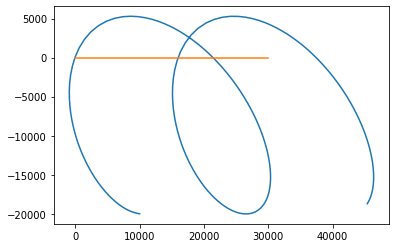

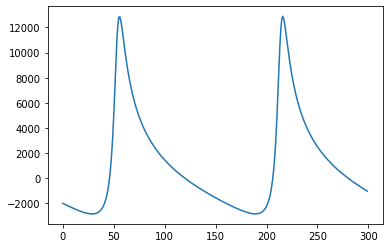

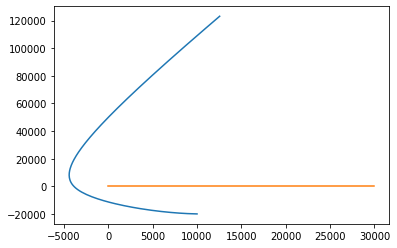

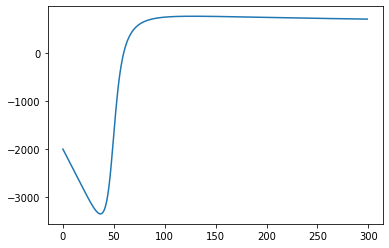

In [24]:
plt.plot(xs,ys,xp,yp)
plt.show()

plt.plot(vxs)
plt.show()

plt.plot(Xs,Ys,Xp,Yp)
plt.show()

plt.plot(Vxs)
plt.show()